# Universal Kriging for reconstructing via sensor measuring the NLTI

In [680]:
#Cargando librerías 

import importlib
import positioning_sensors as ps
importlib.reload(ps)

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

import pykrige.kriging_tools as kt

plt.style.use("ggplot")

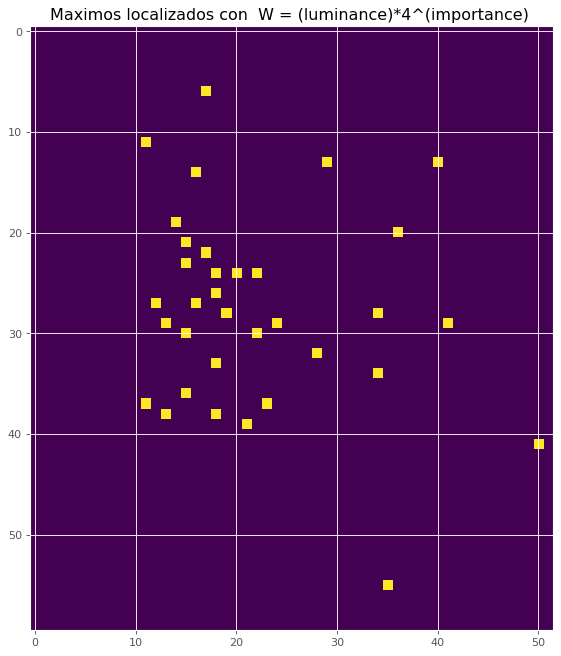

In [681]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)

nonsat = ps.desaturate(luminance,th=62)
nonsat = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')

W1 = ps.f5(nonsat,importance)
seeds = ps.getMax(W1)

seeds_nonsat = ps.getMax(nonsat)
coords_nonsat = ps.get_coords(seeds_nonsat)

plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(seeds*np.max(W1)/2+W1)
plt.imshow(seeds)
plt.title("Maximos localizados con  W = (luminance)*4^(importance) ")
plt.show()

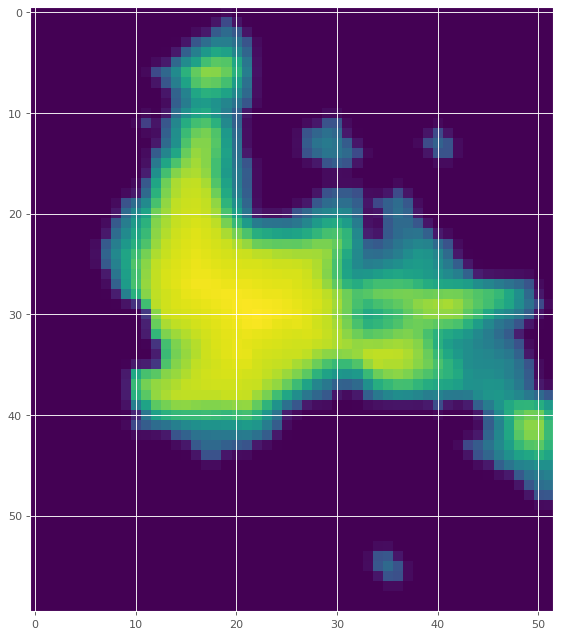

In [682]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(nonsat)

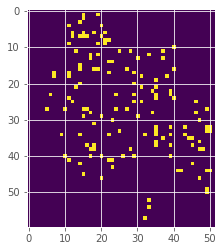

In [695]:
rp = [[np.random.randint(nonsat.shape[0]-1),np.random.randint(nonsat.shape[1]-1)] for i in range(300)]
z = np.array([])
X1 = np.array([])
X2 = np.array([])
randomLoc = np.zeros(nonsat.shape)

for r in rp:
    if nonsat[r[0]][r[1]]>0: 
        
        randomLoc[r[0]][r[1]]=1
        X1 = np.append(X1,r[0])
        X2 = np.append(X2,r[1])
        z  = np.append(z,nonsat[r[0]][r[1]])
plt.imshow(randomLoc)
plt.show()

In [696]:
np.sum(randomLoc)

138.0

In [697]:
test = ps.get_coords(randomLoc)

In [698]:
uk = OrdinaryKriging(X1, X2, z, variogram_model="hole-effect")

In [699]:
gridy = np.arange(0.0, nonsat.shape[0], 1)
gridx = np.arange(0.0, nonsat.shape[1], 1)

In [700]:
z, ss = uk.execute("grid", gridy , gridx)
ss_std = np.squeeze(ss)

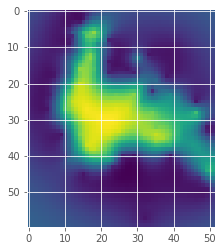

In [701]:
kt.write_asc_grid(gridy, gridx, z, filename="output.asc")
z = np.fliplr(np.rot90((np.flip(z))))

ss_std = np.fliplr(np.rot90((np.flip(ss_std))))
plt.imshow(z)
plt.show()

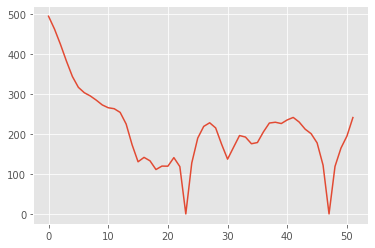

In [702]:
plt.plot(ss_std[30][:])

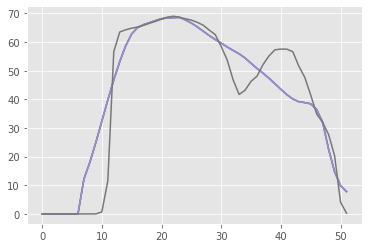

In [703]:
plt.plot(z[30][:]*(nonsat[30][:]>0))

plt.plot(z[30][:]*(nonsat[30][:]>0)+ss_std[30][:]*0)
plt.plot(z[30][:]*(nonsat[30][:]>0)-ss_std[30][:]*0)


plt.plot((nonsat[30][:]))

Text(0.5, 1.0, '200229.34240482457')

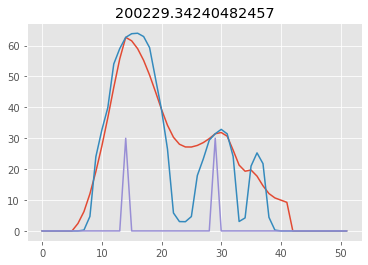

In [704]:
ix= 20
plt.plot(z[:][ix]*(nonsat[:][ix]>0))
plt.plot((nonsat[:][ix]))
plt.plot(randomLoc[:][ix]*30)
plt.title(np.sum((nonsat-z)**2))


Text(0.5, 1.0, '33.10090822232632')

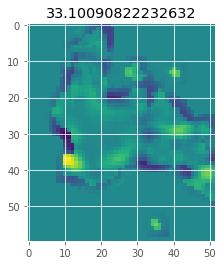

In [705]:
plt.imshow(nonsat-z*(nonsat>0))
plt.title(np.mean((nonsat-z*(nonsat>0))**2))


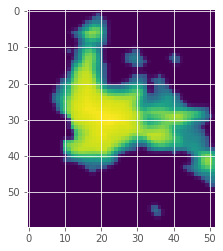

In [706]:
plt.imshow(nonsat)

Referencias

https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/examples/07_regression_kriging2d.html
https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/variogram_models.html?highlight=variogram#variogram-models
https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/examples/07_regression_kriging2d.html
https://link.springer.com/chapter/10.1007%2F978-94-011-5014-9_23